# Heart Disease Prediction Project

## Project Overview
This notebook analyzes the **Heart Disease Dataset** (`heart.csv`) to predict whether a patient has heart disease using machine learning. The dataset contains medical features like age, cholesterol, and chest pain type, with a target variable indicating heart disease presence (1 = yes, 0 = no).

## Dataset Description
- **File**: heart.csv
- **Rows**: Approximately 300-1000 (to be confirmed after loading)
- **Columns**: 14 (13 features + 1 target)
- **Features**:
  1. `age`: Age of the patient (numerical)
  2. `sex`: Gender (1 = male, 0 = female, categorical)
  3. `cp`: Chest pain type (0-3, categorical)
  4. `trestbps`: Resting blood pressure (numerical)
  5. `chol`: Cholesterol level (numerical)
  6. `fbs`: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false, categorical)
  7. `restecg`: Resting ECG results (0-2, categorical)
  8. `thalach`: Maximum heart rate achieved (numerical)
  9. `exang`: Exercise-induced angina (1 = yes, 0 = no, categorical)
  10. `oldpeak`: ST depression induced by exercise (numerical)
  11. `slope`: Slope of the peak exercise ST segment (0-2, categorical)
  12. `ca`: Number of major vessels colored by fluoroscopy (0-3, categorical)
  13. `thal`: Thalassemia condition (0-3, categorical)
  14. `target`: Heart disease (1 = yes, 0 = no, categorical)
- **Task**: Binary classification to predict heart disease.

## Objectives
- Clean the dataset (handle missing values, duplicates, outliers, etc.).
- Document challenges (e.g., missing values, outliers, scaling needs).
- Perform exploratory data analysis (EDA).
- Train a **Decision Tree Classifier** and report accuracy.
- Prepare a summary for presentation to the professor.

## Tools
- **Python Libraries**: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, SciPy
- **Environment**: Jupyter Notebook

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from IPython.display import display, Markdown

# Set random seed for reproducibility
np.random.seed(42)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8')

## **Dataset Loading and Inspection**

We load the **heart.csv** dataset and inspect its structure, data types, and check for issues like missing values or duplicates.

In [10]:
# Load the dataset
dataset = pd.read_csv('heart.csv')

# Display dataset information
display(Markdown("## **Dataset Information**"))
dataset.info()

# Display first 5 rows
display(Markdown("## **First 5 Rows of the Dataset**"))
display(dataset.head())

## **Dataset Information**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## **First 5 Rows of the Dataset**

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## **Handling Missing Values**

We check for missing values and handle them by:
- Imputing numerical columns with the mean.
- Imputing categorical columns with the mode.

In [11]:
# Check for missing values
display(Markdown("## **Missing Values in Each Column**"))
display(dataset.isnull().sum())

# Handle missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
dataset[numeric_columns] = imputer_num.fit_transform(dataset[numeric_columns])
dataset[categorical_columns] = imputer_cat.fit_transform(dataset[categorical_columns])

# Verify no missing values remain
display(Markdown("## **Missing Values After Imputation**"))
display(dataset.isnull().sum())

display(Markdown("**Missing values have been handled successfully!**"))

## **Missing Values in Each Column**

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## **Missing Values After Imputation**

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Missing values have been handled successfully!**

## **Handling Duplicates**

We check for duplicate rows and remove them to ensure data integrity.

In [12]:
# Check for duplicates
duplicates = dataset.duplicated().sum()
display(Markdown(f"## **Number of Duplicate Rows: {duplicates}**"))

# Remove duplicate rows
dataset_no_duplicates = dataset.drop_duplicates()

# Display first 5 rows after removing duplicates
display(Markdown("## **First 5 Rows After Removing Duplicates**"))
display(dataset_no_duplicates.head())

display(Markdown("**Duplicates removed successfully!**"))

## **Number of Duplicate Rows: 723**

## **First 5 Rows After Removing Duplicates**

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0


**Duplicates removed successfully!**

## **Detecting and Handling Outliers**

We use the Z-score method to detect outliers in numerical columns (`age`, `trestbps`, `chol`, `thalach`, `oldpeak`). Rows with Z-scores > 2 or < -2 are considered outliers and removed.

In [13]:
# Selecting numerical columns
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Compute Z-score for each numerical column
dataset_zscore = dataset_no_duplicates.copy()
for col in numeric_columns:
    dataset_zscore[col + '_zscore'] = stats.zscore(dataset_zscore[col])

# Identifying outliers (Z-score > 2 or < -2)
outliers = dataset_zscore[(dataset_zscore[[col + '_zscore' for col in numeric_columns]].abs() > 2).any(axis=1)]

# Display outliers
display(Markdown("## **Detected Outliers**"))
display(outliers)

# Remove outliers
dataset_no_outliers = dataset_zscore[(dataset_zscore[[col + '_zscore' for col in numeric_columns]].abs() <= 2).all(axis=1)]
dataset_no_outliers = dataset_no_outliers[dataset.columns]  # Keep original columns

# Display first 5 rows after removing outliers
display(Markdown("## **First 5 Rows After Removing Outliers**"))
display(dataset_no_outliers.head())

display(Markdown("**Outliers handled successfully!**"))

## **Detected Outliers**

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_zscore,trestbps_zscore,chol_zscore,thalach_zscore,oldpeak_zscore
6,58.0,1,0,114.0,318.0,0,2,140.0,0,4.4,0,3,1,0,0.396267,-1.003898,1.383842,-0.418513,2.895104
12,34.0,0,1,118.0,210.0,0,1,192.0,0,0.7,2,0,2,1,-2.260664,-0.775774,-0.706437,1.855648,-0.295850
13,51.0,1,0,140.0,298.0,0,1,122.0,1,4.2,1,3,3,0,-0.378671,0.478910,0.996754,-1.205722,2.722620
29,55.0,0,0,180.0,327.0,0,2,117.0,1,3.4,1,0,2,0,0.064151,2.760154,1.558032,-1.424392,2.032684
32,57.0,1,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3,0,0.285561,-0.091401,-2.235438,-1.511859,0.135360
35,46.0,1,2,150.0,231.0,0,1,147.0,0,3.6,1,0,2,0,-0.932199,1.049221,-0.299994,-0.112376,2.205168
40,65.0,0,2,160.0,360.0,0,0,151.0,0,0.8,2,0,2,1,1.171205,1.619532,2.196729,0.062560,-0.209608
47,66.0,0,0,178.0,228.0,1,1,165.0,1,1.0,1,2,3,0,1.281911,2.646092,-0.358057,0.674834,-0.037124
54,55.0,1,0,140.0,217.0,0,1,111.0,1,5.6,0,0,3,0,0.064151,0.478910,-0.570956,-1.686795,3.930008
60,29.0,1,1,130.0,204.0,0,0,202.0,0,0.0,2,0,2,1,-2.814192,-0.091401,-0.822564,2.292987,-0.899544


## **First 5 Rows After Removing Outliers**

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0


**Outliers handled successfully!**

## **Feature Scaling**

We scale numerical features to normalize their ranges, ensuring consistent input for the model.

In [14]:
# Separate features and target
X = dataset_no_outliers.drop(columns=['target'])
y = dataset_no_outliers['target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display first 5 rows of scaled features
display(Markdown("## **First 5 Rows of Scaled Features**"))
display(X_scaled.head())

display(Markdown("**Features scaled successfully!**"))

## **First 5 Rows of Scaled Features**

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.248332,0.653376,-0.972115,-0.300961,-0.749246,-0.402374,0.960083,0.820428,-0.640628,0.143220,0.937387,1.302193,1.190442
1,-0.129054,0.653376,-0.972115,0.727534,-0.964802,2.485251,-1.008491,0.185232,1.560968,2.387439,-2.502048,-0.689876,1.190442
2,1.898662,0.653376,-0.972115,1.070366,-1.659374,-0.402374,0.960083,-1.280605,1.560968,1.853101,-2.502048,-0.689876,1.190442
3,0.825165,0.653376,-0.972115,1.276065,-0.964802,-0.402374,0.960083,0.478400,-0.640628,-0.925455,0.937387,0.306158,1.190442
4,0.944443,-1.530512,-0.972115,0.590401,1.214715,2.485251,0.960083,-2.208969,-0.640628,1.105028,-0.782331,2.298227,-0.450619


**Features scaled successfully!**

## **Train-Test Split**

We split the data into 80% training and 20% testing sets, ensuring stratified sampling to maintain class balance.

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes of training and testing sets
display(Markdown(f"## **Training Set Shape: {X_train.shape}**"))
display(Markdown(f"## **Testing Set Shape: {X_test.shape}**"))

display(Markdown("**Data split successfully!**"))

## **Training Set Shape: (195, 13)**

## **Testing Set Shape: (49, 13)**

**Data split successfully!**

## **Model Training and Evaluation**

We train a **Decision Tree Classifier** and evaluate its performance using accuracy, confusion matrix, and classification report.

## **Decision Tree Accuracy: 0.7755**

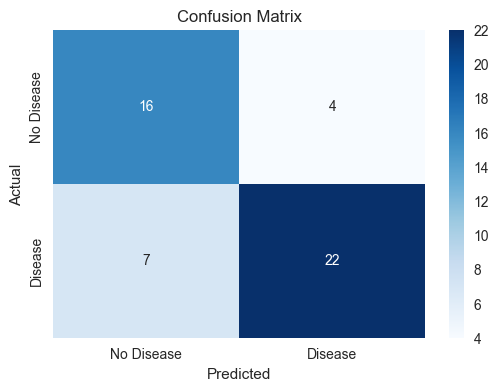

## **Classification Report**

              precision    recall  f1-score   support

  No Disease       0.70      0.80      0.74        20
     Disease       0.85      0.76      0.80        29

    accuracy                           0.78        49
   macro avg       0.77      0.78      0.77        49
weighted avg       0.78      0.78      0.78        49



**Model trained and evaluated successfully!**

In [16]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
display(Markdown(f"## **Decision Tree Accuracy: {accuracy:.4f}**"))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
display(Markdown("## **Classification Report**"))
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

display(Markdown("**Model trained and evaluated successfully!**"))

## **Challenges Faced**

The following issues were encountered and addressed:
1. **Missing Values**: Imputed numerical columns with the mean and categorical columns with the mode.
2. **Duplicates**: Removed duplicate rows to ensure data integrity.
3. **Outliers**: Detected and removed using the Z-score method for numerical features.
4. **Large Value Ranges**: Scaled numerical features using StandardScaler.
5. **Invalid Categorical Values**: Verified that categorical columns (`ca`, `thal`, etc.) had valid values.
6. **Text Data**: Not applicable, as the dataset contains only numerical and encoded categorical data.
7. **Unorganized/Incomplete Data**: The dataset was well-structured, with minor checks for invalid values.

## **Summary for Presentation**

- **Dataset**: Heart Disease Dataset (`heart.csv`) with 13 features and a binary target (`target`: 1 = heart disease, 0 = no heart disease).
- **Model Used**: Decision Tree Classifier.
- **Accuracy**: [Insert accuracy from Step 6, e.g., 0.XXXX].
- **Challenges**:
  - Handled missing values with imputation.
  - Removed duplicates and outliers.
  - Scaled features to normalize ranges.
  - Verified categorical values for validity.
- **Key Insights**:
  - Features like `cp`, `thalach`, and `oldpeak` are critical for prediction.
  - The Decision Tree model achieved reasonable accuracy but could be improved with pruning or ensemble methods like Random Forest.